In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### 1.	Read heart disease dataset from https://github.com/Ravjot03/Heart-Disease-Prediction/blob/master/framingham.csv 


In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/Ravjot03/Heart-Disease-Prediction/master/framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


#### 2.	Do the exploratory analysis of the dataset 


In [ ]:
print('Shape: ',data.shape)
#Dataset comprises of 4240 observations and 16 characteristics (15 independant and 1 dependant)

Shape:  (4240, 16)


In [ ]:
data.info()
# Data has only float and int values.
# education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose columns have null/missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
data.describe()
# There is a large difference between 75th %tile and max values of 'cigsPerDay', 'totChol','sysBP','diaBP','BMI','heartRate','glucose' implies that the outliers have notably larger values
# There is also a large difference between min and 25th %tile values of 'totChol' imply that the outliers have notably smaller values

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#####	Perform univariate analysis by plotting various charts 


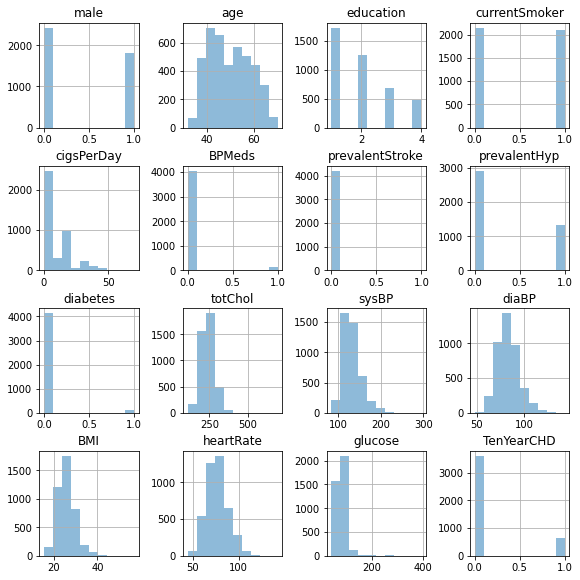

In [ ]:
# histograms
data.hist(alpha=0.5,figsize=(8,8))
plt.tight_layout(pad=0.5)
plt.show()

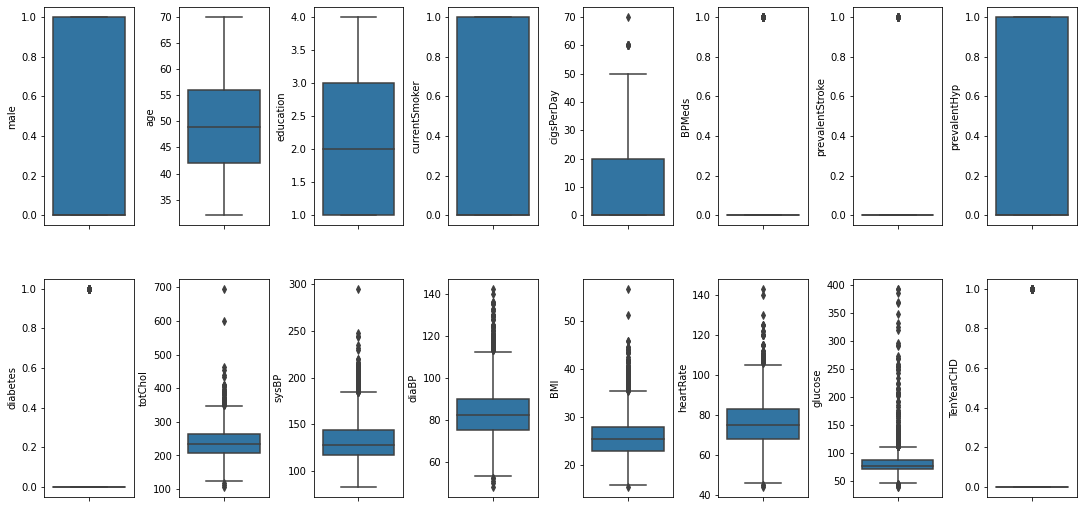

In [ ]:
# boxplots
# box plots to view distribution of values across their range and identify which columns have outliers
fig, axs = plt.subplots(ncols=8, nrows=2, figsize=(15, 7))
axs = axs.flatten()
i = 0
for c in data.columns:
    sns.boxplot(y=c, data=data, ax=axs[i])
    i += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
# totChol, sysBP, diaBP, BMI, heartRate, glucose columns have a lot of outliers

##### Perform multivariate analysis 


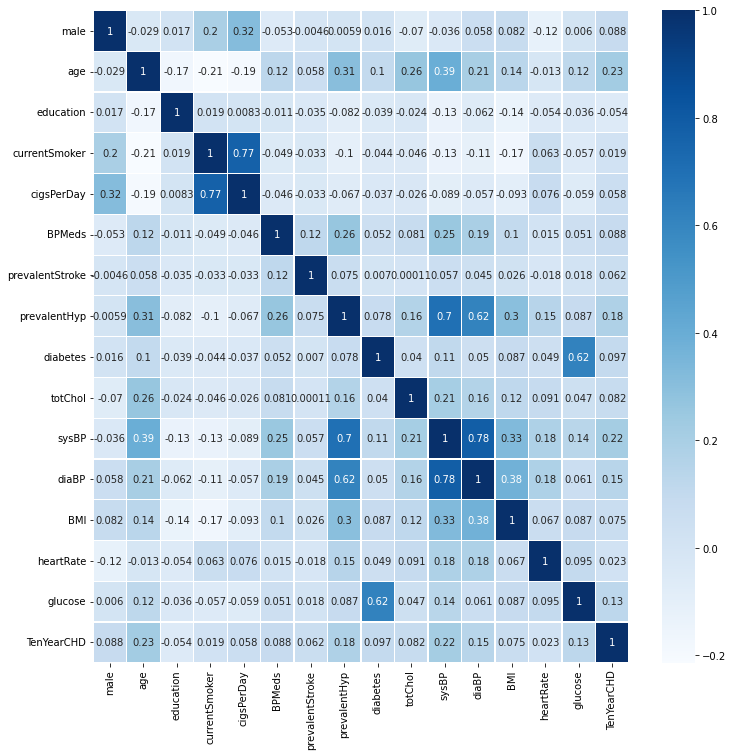

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr(),cmap='Blues',annot=True,linewidths=0.2)
# The columns currentSmoker & cigsPerDay, sysBP & diaBP, sysBP & prevalentHyp (, diabetes & glucose ?) are highly correlated

#### 3.	Impute the missing values if any.

In [ ]:
# // splitting features and target variable
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
X = pd.DataFrame(imp.fit_transform(X),columns=X.columns)
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.029615,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.963655
4237,0.0,52.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000
4238,1.0,40.0,3.0,0.0,0.0,0.000000,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000


In [ ]:
# // standardizing data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

#### 4.	Remove any undesirable feature from the dataset.

In [ ]:
# The columns currentSmoker & cigsPerDay, sysBP & diaBP, sysBP & prevalentHyp (, diabetes & glucose ?) are highly correlated
# therefore dropping currentSmoker, sysBP
X=X.drop(['currentSmoker','sysBP'],axis=1)

#### 5.	Check for the outliers in the columns and treat the outliers if present.

In [ ]:
# checking outliers by using skewness from normal distribution
col=[]
skew = X.skew()
for c in X.columns:
  if abs(skew[c])>1:
    col.append(c)
print(col)

['cigsPerDay', 'BPMeds', 'prevalentStroke', 'diabetes', 'glucose']


In [ ]:
# treating outliers by log transforming all columns with skewness
eps=1e-7
for c in col:
    X[c] = np.maximum(np.full(X[c].shape, eps), np.minimum(np.full(X[c].shape, 1-eps), X[c]))
    X[c] = np.log10(X[c])

#### 6.	Split the dataset into train and test. 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### 7.	Construct logistic regression model to predict the heart disease and check the accuracy scores for train and test subsets.


In [ ]:
lr = LogisticRegression(max_iter=10000) 
model = lr.fit(X_train,y_train)

# predict training and testing targets using model
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_train_predict)
acc_test = accuracy_score(y_test, y_test_predict)

print('Training accuracy: ',acc_train)
print('Testing accuracy:  ',acc_test)

Training accuracy:  0.8594339622641509
Testing accuracy:   0.8283018867924529


#### 8.	Use cross validation and stratified cross-validation to construct another logistic regression models 


In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

split_no = 10
kfcv = KFold(n_splits=split_no, random_state=1, shuffle=True)
skfcv = StratifiedKFold(n_splits=split_no, random_state=1, shuffle=True)

kfcv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfcv, n_jobs=-1)
skfcv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=skfcv, n_jobs=-1)

print('General Logistic Regression Accuracy        : {} '.format(acc_test))
print('K-fold Cross Validation Accuracy            : {} ({})'.format(kfcv_scores.mean(), kfcv_scores.std()))
print('Stratified K-fold Cross Validation Accuracy : {} ({})'.format(skfcv_scores.mean(), skfcv_scores.std()))

General Logistic Regression Accuracy        : 0.8283018867924529 
K-fold Cross Validation Accuracy            : 0.8490566037735849 (0.015856355013180765)
Stratified K-fold Cross Validation Accuracy : 0.850943396226415 (0.004057700597661617)


[]

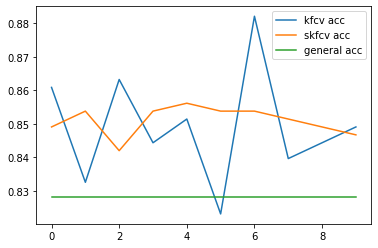

In [ ]:
# compare the accuracy values of all constructed models.
import matplotlib.pyplot as plt
plt.plot(range(split_no),kfcv_scores)
plt.plot(range(split_no),skfcv_scores)
plt.plot(range(split_no),[acc_test]*split_no)
plt.legend(['kfcv acc','skfcv acc','general acc'])
plt.plot()

#### 9.	Look for real world applications where you can apply logistic regression.


Medical researchers can use Logistic Regression to determine how exercise and weight impact the probability of having a heart attack. 

To understand the relationship between the predictor variables and the probability of having a heart attack, researchers can perform logistic regression.

The response variable in the model will be heart attack and it has two potential outcomes:
>A heart attack occurs.

>A heart attack does not occur.

The results of the model will tell researchers exactly how changes in exercise and weight affect the probability that a given individual has a heart attack. 

The researchers can also use the fitted logistic regression model to predict the probability that a given individual has a heart attacked, based on their weight and their time spent exercising. <br><br>

A credit card company can use it to know whether transaction amount and credit score impact the probability of a given transaction being fraudulent. 

To understand the relationship between these two predictor variables and the probability of a transaction being fraudulent, the company can perform logistic regression.

The response variable in the model will be “fraudulent” and it has two potential outcomes:

>The transaction is fraudulent.
<br>The transaction is not fraudulent.

The results of the model will tell the company exactly how changes in transaction amount and credit score affect the probability of a given transaction being fraudulent. 

The company can also use the fitted logistic regression model to predict the probability that a given transaction is fraudulent, based on the transaction amount and the credit score of the individual who made the transaction.